[a] Using the optical recognition of handwritten digits dataset from scikit-learn (https://scikit-learn.org/stable/datasets.html), assess the parameters for the SVMs. Optimise both the kernel and the C parameter.


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets.to_numpy().ravel()
  
# metadata 
# print(optical_recognition_of_handwritten_digits.metadata) 
  
# variable information 
# print(optical_recognition_of_handwritten_digits.variables) 


In [44]:
print (X.shape)
print (y.shape)

(5620, 64)
(5620,)


In [68]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score, confusion_matrix
k = 5 # number of folds

In [46]:
### SVC(Support Vector Classifier) 
model = svm.SVC()

kf = KFold(n_splits=k)

results = cross_val_score(model, X, y, cv=kf)

print (results)

[0.9866548  0.98754448 0.98754448 0.97686833 0.98220641]


In [50]:
Kernel = ['linear', 'poly', 'rbf', 'sigmoid']
### Notes about the kernal "rbf"
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
# it is deemed as the default kernel
# it has parameters gamma, which defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.

C = [0.01, 0.1, 1, 10, 100, 1000]

results = []
for c in C:
    for kernel in Kernel:
        model = svm.SVC(C=c, kernel=kernel)
        kf = KFold(n_splits=k)
        result = cross_val_score(model, X, y, cv=kf)
        results.append([c, kernel, result.mean()])

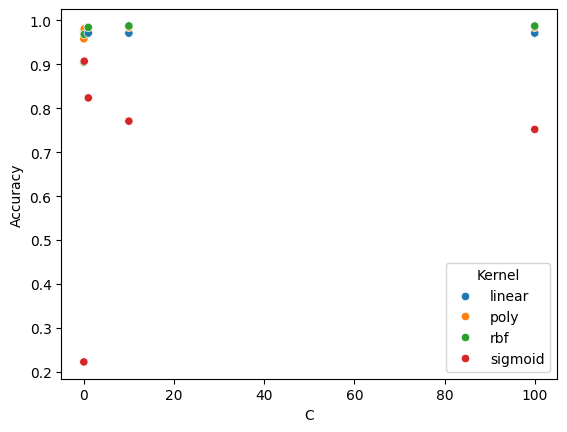

In [52]:
### Plot the results with different kernel and C values
results = pd.DataFrame(results, columns=['C', 'Kernel', 'Accuracy'])
sns.scatterplot(x='C', y='Accuracy', hue='Kernel', data=results)
plt.show()

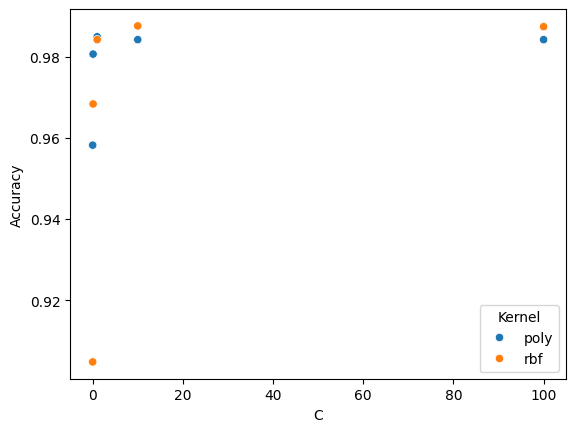

In [57]:
### From results above, we find the accuracy of sigmoid kernel the lowest, followed by linear kernel
### So we remove it and plot again
sns.scatterplot(x='C', y='Accuracy', hue='Kernel', data=results[results['Kernel'].isin(['poly', 'rbf'])])
plt.show()

In [83]:
### Take a closer look at the results with respect to C, note that smaller C values will result is a more complex model
results = []
kappas = []
for c in [0.1, 1, 10, 50, 100, 500, 1000, 2000]:
    for kernel in ['poly', 'rbf']:
        model = svm.SVC(C=c, kernel=kernel)
        kf = KFold(n_splits=k)
        result = cross_val_score(model, X, y, cv=kf)
        kappa = cohen_kappa_score(y, model.fit(X, y).predict(X))
        results.append([c, kernel, result.mean()])
        kappas.append([c, kernel, kappa])

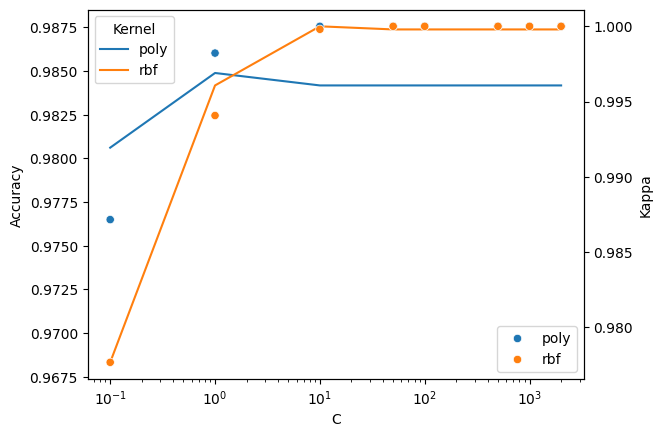

In [84]:
### Plot the results with different kernel and C values
results = pd.DataFrame(results, columns=['C', 'Kernel', 'Accuracy'])
kappas = pd.DataFrame(kappas, columns=['C', 'Kernel', 'Kappa'])
sns.lineplot(x='C', y='Accuracy', hue = 'Kernel', data=results)
plt.twinx()
sns.scatterplot(x='C', y='Kappa', hue = 'Kernel', data=kappas)
plt.xscale('log')
plt.legend(loc='lower right')
plt.show()


[b] Assess the “effect” of data size (number of points). Perform the analysis on 10%, 25%, 50%, 75% and 90% of the data. Compare and contrast your conclusions.

[c] Introduce 5 random, strong outliers in the data, and compare and contrast your conclusions for the subsamples (without replacement) mentioned in [b].